<a href="https://colab.research.google.com/github/minhdvo/project/blob/master/LSTM_Beijing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This notebook was created and run in Google Colab

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',  
                      parse_dates = [['year', 'month', 'day', 'hour']],index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# delete column 'No'
dataset.drop('No', axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [4]:
# change column name and index name
dataset.columns = ['Pollution', 'DEWP', 'Temperature', 'Pressure', 'Wind_Dir', 'Wind_Spd', 'Snow', 'Rain']
dataset.index.name = 'date'

dataset.head()

,Pollution,DEWP,Temperature,Pressure,Wind_Dir,Wind_Spd,Snow,Rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
# Fill NaN value
dataset['Pollution'].fillna(0, inplace=True)

# remove data of first 24h
dataset = dataset[24:]

dataset.head(10)

,Pollution,DEWP,Temperature,Pressure,Wind_Dir,Wind_Spd,Snow,Rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
Pollution      43800 non-null float64
DEWP           43800 non-null int64
Temperature    43800 non-null float64
Pressure       43800 non-null float64
Wind_Dir       43800 non-null object
Wind_Spd       43800 non-null float64
Snow           43800 non-null int64
Rain           43800 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [7]:
dataset.describe()

,Pollution,DEWP,Temperature,Pressure,Wind_Spd,Snow,Rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


### EDA

<Figure size 864x864 with 0 Axes>

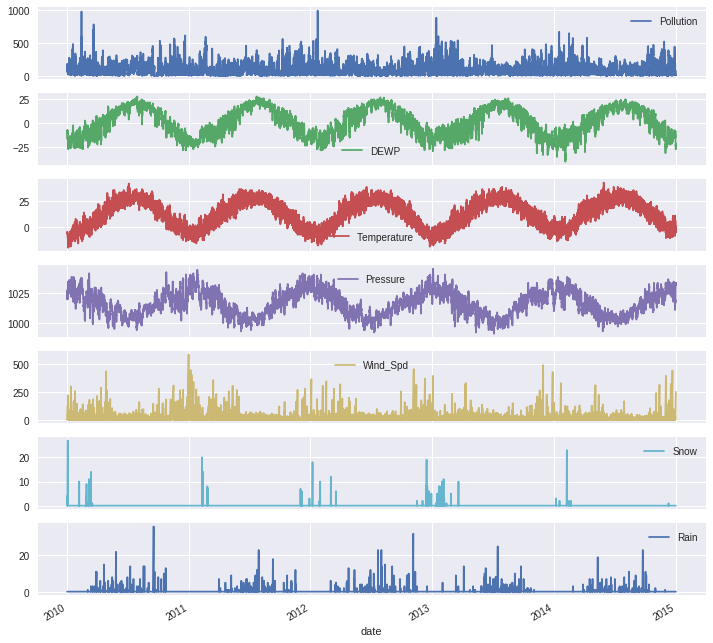

In [8]:
plt.figure(figsize=(12,12))
dataset.plot(subplots=True,figsize=(12,12))
plt.show()

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat

values = dataset.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545455,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563636,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563636,0.666667,0.009912,0.074074,0.0,0.109658


### Split data
- Train (whole year 365*24) and Test set
- Reshape data into 3D (sample, timestep and feature)

In [11]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [12]:
train_X

array([[[0.12977867, 0.35294118, 0.24590164, ..., 0.00229001,
         0.        , 0.        ]],

       [[0.14889336, 0.36764706, 0.24590164, ..., 0.00381099,
         0.        , 0.        ]],

       [[0.15995976, 0.42647059, 0.2295082 , ..., 0.00533197,
         0.        , 0.        ]],

       ...,

       [[0.        , 0.32352941, 0.2295082 , ..., 0.10542596,
         0.        , 0.        ]],

       [[0.        , 0.32352941, 0.16393443, ..., 0.11229599,
         0.        , 0.        ]],

       [[0.        , 0.33823529, 0.19672131, ..., 0.12070409,
         0.        , 0.        ]]])

In [13]:
train_y

array([0.14889336, 0.15995976, 0.18209256, ..., 0.        , 0.        ,
       0.0362173 ])

In [14]:
test_X

array([[[0.0362173 , 0.33823529, 0.19672131, ..., 0.12757413,
         0.        , 0.        ]],

       [[0.03118712, 0.33823529, 0.19672131, ..., 0.006101  ,
         0.        , 0.        ]],

       [[0.02012072, 0.33823529, 0.19672131, ..., 0.0145091 ,
         0.        , 0.        ]],

       ...,

       [[0.01006036, 0.26470588, 0.26229508, ..., 0.40558831,
         0.        , 0.        ]],

       [[0.01006036, 0.26470588, 0.26229508, ..., 0.41399641,
         0.        , 0.        ]],

       [[0.00804829, 0.26470588, 0.24590164, ..., 0.42086644,
         0.        , 0.        ]]])

In [15]:
test_y

array([0.03118712, 0.02012072, 0.01911469, ..., 0.01006036, 0.00804829,
       0.01207243])

## Build model

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, 
               input_shape=(train_X.shape[1], train_X.shape[2]),
               return_sequences = True, 
              )
         )
model.add(LSTM(units=50, 
               return_sequences = True, 
              )
         )
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [17]:
history = model.fit(train_X, train_y, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(test_X, test_y), 
                    verbose=0, 
                    shuffle=False)

Instructions for updating:
Use tf.cast instead.


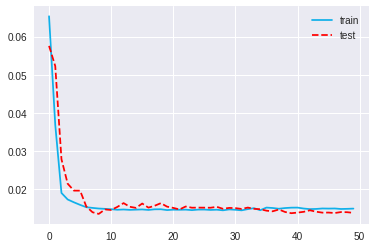

In [18]:
plt.plot(history.history['loss'],"#10b0ea",label='train')
plt.plot(history.history['val_loss'],"r--",label='test')
plt.legend()
plt.show()

In [19]:
# predicted values
yhat = model.predict(test_X)

yhat

array([[0.03412074],
       [0.03021617],
       [0.02045628],
       ...,
       [0.00960662],
       [0.00958257],
       [0.00804105]], dtype=float32)

In [0]:
from math import sqrt

from sklearn.metrics import mean_squared_error

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

### RMSE

In [21]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.058


### MAE

In [22]:
from sklearn.metrics import median_absolute_error

mae = median_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test MAE: 7.159


### R-square

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(inv_y, inv_yhat)
print('Test R2: %.3f' % r2)

Test R2: 0.914


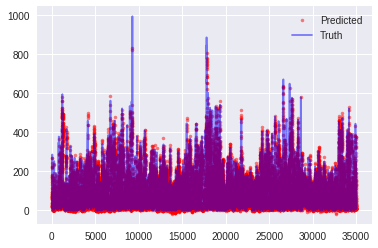

In [24]:
plt.plot(inv_yhat,'r.',label="Predicted",alpha=0.5)
plt.plot(inv_y,'b-',label="Truth",alpha=0.5)
plt.legend()
plt.show()

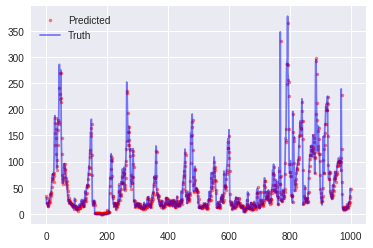

In [25]:
# first 1000 hours
plt.plot(inv_yhat[:1000],'r.',label="Predicted",alpha=0.5)
plt.plot(inv_y[:1000],'b-',label="Truth",alpha=0.5)
plt.legend()
plt.show()

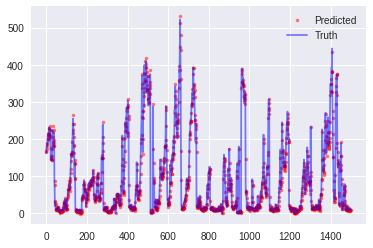

In [26]:
# last 1500 hours
plt.plot(inv_yhat[-1500:],'r.',label="Predicted",alpha=0.5)
plt.plot(inv_y[-1500:],'b-',label="Truth",alpha=0.5)
plt.legend()
plt.show()